In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


### Question 2 

In [2]:
from pandas import read_csv
# a function that takes filepath as string and returns the data included
def load_data(filepath: str) -> pd.DataFrame:
    # setting the names of data coloumns
    coloumn_names = ['Petal Length','Petal Width', 'Sepal Length', 'Sepal Width', 'Species Type'] 
    data = pd.read_csv(filepath, names =coloumn_names)
    data_1 = pd.DataFrame(data)
    
    return data_1
data_1 = load_data('iris.data')
#  head() print the first 5 rows of  data 
data_1.head()

,Petal Length,Petal Width,Sepal Length,Sepal Width,Species Type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Petal Length  150 non-null    float64
 1   Petal Width   150 non-null    float64
 2   Sepal Length  150 non-null    float64
 3   Sepal Width   150 non-null    float64
 4   Species Type  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
#creating dataset "target"

target = []

for iter in range (len(data_1['Species Type'])):
    if data_1['Species Type'][iter] == ('Iris-setosa'):
        target.append(1)
    else: 
        target.append(0)
data_1['target'] = target

data_1.head(100)


,Petal Length,Petal Width,Sepal Length,Sepal Width,Species Type,target
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,Iris-versicolor,0
96,5.7,2.9,4.2,1.3,Iris-versicolor,0
97,6.2,2.9,4.3,1.3,Iris-versicolor,0
98,5.1,2.5,3.0,1.1,Iris-versicolor,0


In [5]:
data_1.describe()

,Petal Length,Petal Width,Sepal Length,Sepal Width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,0.333333
std,0.828066,0.433594,1.764420,0.763161,0.472984
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,0.000000
75%,6.400000,3.300000,5.100000,1.800000,1.000000
max,7.900000,4.400000,6.900000,2.500000,1.000000


In [6]:
data_1.groupby('target').size()

target
0    100
1     50
dtype: int64

### Question 3 : Splitting the data

For this question we want to take this dataset of 150 rows, and split it into a train, test, and validation dataset, using the following proportions for each split:

$$Training: 70\%
\\
Validation: 10 \%
\\
Testing: 20 \%
\\$$
Sample data for each subset using stratified sampling. I.e. the training data should have roughly 
 
 positive samples, the testing and validation dataset should also have roughly 
 
 positive samples.

In [7]:
# Splitting data into positive and negative classes
data_1_positive = data_1.loc[data_1['target'] == 1]
data_1_negative = data_1.loc[data_1['target'] == 0]

# Splitting positive class data for training, validation, and test
train_data_pos, valid_data_pos, test_data_pos = (
    data_1_positive.iloc[:35],
    data_1_positive.iloc[35:40],
    data_1_positive.iloc[40:50]
)

# Splitting negative class data for training, validation, and test
train_data_neg, valid_data_neg, test_data_neg = (
    data_1_negative.iloc[:70],
    data_1_negative.iloc[70:80],
    data_1_negative.iloc[80:100]
)

# Concatenating positive and negative class data for training, validation, and test
train_data = pd.concat([train_data_pos, train_data_neg], ignore_index=True, axis=0).sample(105, random_state=1)
valid_data = pd.concat([valid_data_pos, valid_data_neg], ignore_index=True, axis=0).sample(15, random_state=1)
test_data = pd.concat([test_data_pos, test_data_neg], ignore_index=True, axis=0).sample(30, random_state=1)

# Displaying the sizes of the training, validation, and test sets
print("Train data contains:", train_data.groupby('target').size())
print("Validation data contains:", valid_data.groupby('target').size())
print("Test data contains:", test_data.groupby('target').size())


Train data contains: target
0    70
1    35
dtype: int64
Validation data contains: target
0    10
1     5
dtype: int64
Test data contains: target
0    20
1    10
dtype: int64


### Question 4:



We will choose 2 iris dataset ( petal length, petal width)

In [8]:
# Feature sets
train_x = train_data[['Petal Width', 'Petal Length']]
valid_x = valid_data[['Petal Width', 'Petal Length']]
test_x = test_data[['Petal Width', 'Petal Length']]

# Target sets
train_y = train_data['target']
valid_y = valid_data['target']
test_y = test_data['target']

# Printing target values for the test set
print(test_y)



17    0
21    0
10    0
19    0
14    0
20    0
26    0
3     1
24    0
22    0
23    0
4     1
2     1
25    0
6     1
18    0
13    0
7     1
27    0
1     1
16    0
0     1
15    0
29    0
28    0
9     1
8     1
12    0
11    0
5     1
Name: target, dtype: int64


error function for a binary regression, is the bbinary cross entropy, defined as:

$$L = -\frac{1}{n}\sum_i^n y_i \log(\hat{y_i}) + (1-y_i) \log(1-\hat{y_i})$$

Where the finite difference gradient of this function is defined by:

$$\frac{\partial L}{\partial \beta_i} = \frac{L(x,y;\beta_i + \epsilon, \beta) - L(x,y;\beta_i, \beta)}{\beta_i + \epsilon - \beta_i} \\[12pt]

\frac{\partial L}{\partial \beta_i}=\frac{L(x,y;\beta_i + \epsilon, \beta) - L(x,y;\beta_i, \beta)}{\epsilon} 
$$

In [9]:
def bce(y, yhat):
    # Convert inputs to NumPy arrays
    y = np.array(y)
    yhat = np.array(yhat)

    # Compute the negative and positive parts of the binary cross-entropy loss
    neg_part = (1 - y) * np.log(1 - yhat)
    pos_part = y * np.log(yhat)

    # Calculate the overall binary cross-entropy loss
    N = len(y)
    bce_loss = (-1/N) * np.sum(pos_part + neg_part)

    return bce_loss

In [10]:
# implementation of logistic regressor class
class LogisticRegressor:

    def __init__(self, n_features: int = 2):

        # Initialize parameters randomly
        self.params = np.random.randn(n_features + 1)

    def lm(self, x):

        # Linear regresor
        h = self.params[0] + self.params[1:] @ x.T
        return h

    def logistic(self, h):

        # Logistic Regresor
        z = 1 / (1 + np.exp(-h))
        return z

    def gradient_decent(self, x, y, epsilon = 1e-4):

        # Gradient of variables under examination
        n = len(self.params)
        epsilon_matrix = np.diag(np.zeros(n) + np.array(epsilon))
        params_matrix = np.full((n,n),self.params) + epsilon_matrix
        
        # Gradient vector
        gradient = np.zeros(n)

        # Calculate gradient for each row of epsilon matrix
        for i in range(n):
            params = params_matrix[i,:]
            h_e = params[0] + params[1:] @ x.T
            z_e = self.logistic(h_e)
            z = self.logistic(self.lm(x))
            gradient[i] = (bce(y, z_e) - bce(y, z)) / epsilon

        return gradient

    def fit(self, train_x, train_y, valid_x, valid_y, epochs: int = 1000, lr: float = 0.01):
       
        # Train the model using gradient descent and finite-differences
        training_loss   = []
        validation_loss = []

        for epoch in range(epochs):
          gradient = self.gradient_decent(train_x, train_y, epsilon = 1e-4)
          z = self.logistic(self.lm(train_x))
          z_validation = self.logistic(self.lm(valid_x))
          self.params -= (lr * gradient)
          training_loss.append(bce(train_y, z))
          validation_loss.append(bce(valid_y, z_validation)) 

        return training_loss, validation_loss
   
    def predict(self, x, threshold = 0.5):

        # Model prediction based on regressor variables and threshold
        self.probabiity= self.logistic(self.lm(x))
        yhat = [1 if i >= threshold else 0 for i in self.probabiity]
        return yhat
    

### Question 5:


Visualise the training and validation loss. Is there a point at which the model begins to over fit? How do you know that the model is beginning to overfit by looking at these curves?

In [11]:
LRG = LogisticRegressor()


In [12]:
training_loss, validation_loss = LRG.fit(train_x, train_y, valid_x, valid_y)

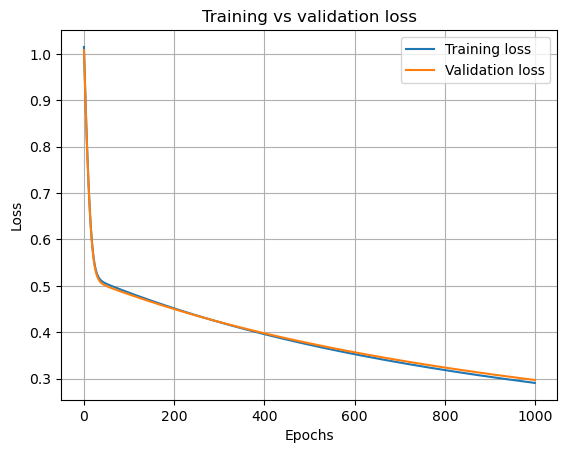

In [13]:
plt.plot(training_loss)
plt.plot(validation_loss)
plt.title("Training vs validation loss")
plt.xlabel("Epochs")
plt.legend(['Training loss','Validation loss'])
plt.ylabel("Loss")
plt.grid()
plt.show()

In [14]:
yhat = LRG.predict(test_x)
print(yhat)

[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1]


Visualizing the data to see if there is overfitting  or not.

In [15]:
# predict if there is overfitting or not 
valid_loss = validation_loss[0]
for iter in range(1,100):

    if validation_loss[iter]< valid_loss:
        valid_loss = validation_loss[iter]

    else:
        print('overfitting at ', iter)
        break


    # if it did not print " then it is not overfitting"

### Question 6: 


Predict the class labels for the testing set.

For the testing set, calculate the:

$$\text{TP number of true positives}$$
$$\text{TN number of true negatives}$$
$$\text{FP number of false positives}$$
$$\text{FN number of false negatives}$$


In [16]:
def performance_measure(y, yhat):
    # Logical AND Gate (TP: True Positives)
    TP = np.sum(np.logical_and(y, yhat))
    
    # Logical NOR Gate (TN: True Negative)
    TN = np.sum(np.logical_and(np.logical_not(y),np.logical_not(yhat)))
    
    # Logical A'B Gate (FP: False Positives)
    FP = np.sum(np.logical_and(np.logical_not(y),yhat))
    
    # Logical AB' Gate (FN: False Negatives)
    FN = np.sum(np.logical_and(y,np.logical_not(yhat)))
    
    return TP, TN, FP, FN


In [17]:
y = test_y
TP, TN, FP, FN  = performance_measure(y,yhat)
print(performance_measure(y, yhat))

(9, 20, 0, 1)


### Question 7:

In order to calculate the precision and the recall and F1 score

By implementing these equations:
$$Precission = \frac{TP}{TP + FP}$$

$$Recall = \frac{TP}{TP + FN}$$

$$F_{\beta} = (1 + \beta^{2})\frac{Precission * Recall}{(\beta^{2}* Precision) + Recall)}$$


In [18]:
def precission(y,yhat):
    #Calculate precission using TP,TN,FP,FN.
    TP,TN,FP,FN = performance_measure(y,yhat)
    pres = TP / (TP + FP) # Calculate precission
    return pres

def recall(y,yhat):
    #Calculate recall using performance measure
    TP,TN,FP,FN = performance_measure(y,yhat)
    rec = TP /(TP+ FN)
    return rec

def f1score(y, yhat, beta=1):
    #Calculate F1 score using precision and recall
    Precision = precission(y, yhat)
    Recall = recall(y, yhat)

    #Compute F1 score
    F1 = (1 + beta**2) * ((Precision * Recall) / ((beta**2 * Precision) + Recall))
    return F1

In [19]:
pr = precission(test_y, yhat = 0.5)
rc = recall(test_y, yhat  =0.5)
print(pr, rc)

0.3333333333333333 1.0


### Question 8:

Generate a report using the precision, recall and 
 and confusion matrix. The report should be printed like:

    |        |          | Predicted |          |
    |        |          |  Positive | Negative |
    | Actual | Positive |         5 |        2 |
    |        | Negative |         3 |        1 |
    
    - Precision: 0.6
    - Recall: 0.6
    - F_1 Score: 0.6

In [20]:
def print_report(y,yhat):
    
    #Calculate and print metrics for the classification problem
    TP,TN,FP,FN = performance_measure(y,yhat)
    pr = np.round( precission(y,yhat),1)
    rc = np.round( recall(y,yhat),1)
    f1 = np.round(f1score(y,yhat),1)

    row_1 = "|" + " " * 8 + "|" + " " * 10 + "| Predicted |" + " " *10 + "|\n"
    row_2 = "|" + " " * 8 + "|" + " " * 10 + "|  Positive |" + " Negative |\n"
    row_3 = "| Actual |" + " Positive |" + " " * (10 - len(str(TP))) + str(TP) + " |" + " " * (9 - len(str(FN))) + str(FN) + " |\n"
    row_4 = "|" + " " * 8 + "|" + " Negative |" + " " * (10 - len(str(FP))) + str(FP) + " |" + " " * (9 - len(str(TN))) + str(TN) + " |\n\n"
    row_5 = "- Precision: {0} \n".format(pr)
    row_6 = "- Recall: {0} \n".format(rc)
    row_7 = "- F_1 Score: {0} \n".format(f1)

    grid_mat  = (row_1+row_2+row_3+row_4+row_5+row_6+row_7)
    print(grid_mat)

In [21]:
print_report(y,yhat)

|        |          | Predicted |          |
|        |          |  Positive | Negative |
| Actual | Positive |         9 |        1 |
|        | Negative |         0 |       20 |

- Precision: 1.0 
- Recall: 0.9 
- F_1 Score: 0.9 



### Question 9: 

Calculating the true and false positive rate, then generating a ROC curve

$$FP_R = \frac{FP}{FP + TN}$$

$$TP_R = \frac{TP}{TP + TN}$$

In [22]:
def roc(y, LRG ,x, threshold_step=0.01):
    # iteratively increase the threshold by threshold_step,
    # calculating the TP and FP rate for each iteration. This function 
    # should return two lists, a list of TP rates, and a list of FP rates.

    # Calculate ROC curve.
    ## Creating an array 'steps' ranging from 0 to 1 with a specified step size 'threshold_step'
    steps  = np.arange(0,1, threshold_step)

    ## Initializing empty lists to store true positives (tps) and false positives (fps)
    tps    = []
    fps    = []
    
    for step in steps:
        pred = LRG.predict(x, step)
        TP,TN,FP,FN = performance_measure(y,pred)
        tps.append(TP / (TP + FN))
        fps.append(FP / (FP + TN))
    return fps, tps
    
fps, tps= roc(test_y ,LRG,test_x)


# visualise the ROC curve here

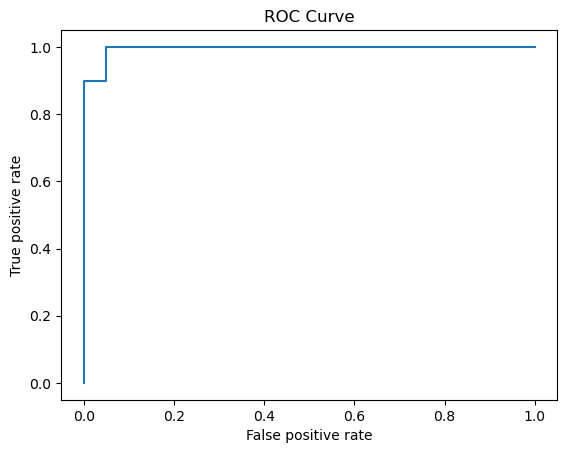

In [23]:

plt.plot(fps,tps)
plt.title("ROC Curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

### Question 10:

Now that you’ve created a logistic regressor for two features of the Iris dataset and have created some analytic results. Select another two columns (i.e. petal width and sepal length, or petal length and sepal width). Create a different logistic regressor using these new columns and create the same results as you did with questions 8 and 9.

Compare these two models trained with different columns. Which model is best, and why do we know that it’s the best?

"Sepal_Length" and "Sepal_Width" exhibit the least distinguishable characteristics for a logistic model; consequently, these variables will be employed to train model.

In [24]:
# An object using the LogisticRegressor class is generated. 
LRG2 = LogisticRegressor()


train_x=train_data[['Sepal Width','Sepal Length']]# this is train data x, I just get the petal width and petal lenght as x
train_y=train_data['target']# take the target value as y

valid_x=valid_data[['Sepal Width','Sepal Length']]
valid_y=valid_data['target']

test_x=test_data[['Sepal Width','Sepal Length']]
test_y=test_data['target']

# The model is adjusted
training_loss, validation_loss = LRG2.fit(train_x, train_y, valid_x, valid_y)


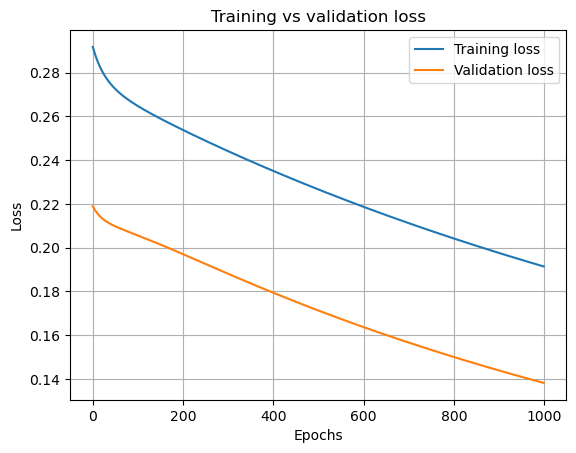

In [25]:
# The model training and validation loss are plotted.

plt.plot(training_loss)
plt.plot(validation_loss)
plt.title("Training vs validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(['Training loss','Validation loss'])
plt.grid()
plt.show()

In [26]:
y = test_y

yhat_2 = LRG2.predict(test_x)

print_report(y,yhat_2)


|        |          | Predicted |          |
|        |          |  Positive | Negative |
| Actual | Positive |         9 |        1 |
|        | Negative |         0 |       20 |

- Precision: 1.0 
- Recall: 0.9 
- F_1 Score: 0.9 



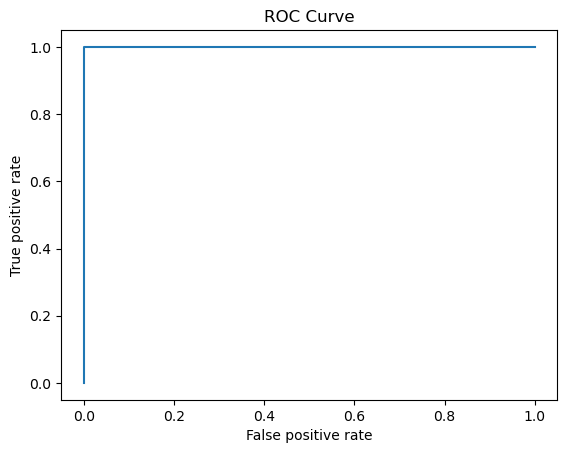

In [27]:
fps, tps =roc(y, LRG2, test_x)
plt.plot(fps,tps)
plt.title("ROC Curve")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

The outcomes of training for both models indicate that, with this dataset, employing pairs of distinct regressor variables yields  identical results when assessed with the test data. Even in the least favorable scenario, the results remain similar, regardless the chosen threshold.




